In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import seaborn as sns
import scipy

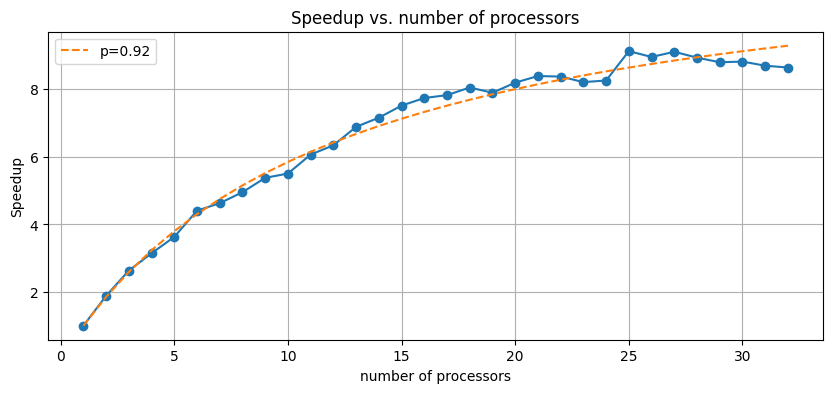

In [7]:
# Task 5 -----------------------------------------------------------------
#retrieve data
with open('task5_result.txt', 'r') as file:
    task5_content = file.read()

#process data
task5_content =dict(eval(task5_content))
result = np.array([np.array([key,val]) for key,val in task5_content.items()])
n_processors, exec_times = result.T
n_processors = n_processors.astype(np.int8)

# #compute speedup
speedup = exec_times[0]/exec_times

#visualize data
#Execution time plot
fig, ax = plt.subplots(1,1, figsize = (10,4))
ax.plot(n_processors, exec_times)
ax.set(title=f'Execution time vs. number of processors', xlabel='number of processors', ylabel='Time (s)')
ax.grid(True)
#plt.savefig(f'images/task5/task5_execution_time.png', bbox_inches='tight')
plt.close()
def amdahl(P, F):
    return 1 / (F/P + (1 - F))

params, _ = scipy.optimize.curve_fit(amdahl, n_processors, speedup, bounds=(0, 1))
F_opt = params[0]

fig, ax = plt.subplots(1,1, figsize = (10,4))
ax.plot(n_processors, speedup, linestyle='-', marker='o', label='')
ax.plot(n_processors, [amdahl(p, F_opt) for p in n_processors], '--', label=f'p={F_opt:.2f}')
ax.set(title=f'Speedup vs. number of processors', xlabel='number of processors', ylabel='Speedup')
ax.legend()
ax.grid(True)
#plt.savefig(f'images/task5/task5_amdahl.png', bbox_inches='tight')
#plt.close()

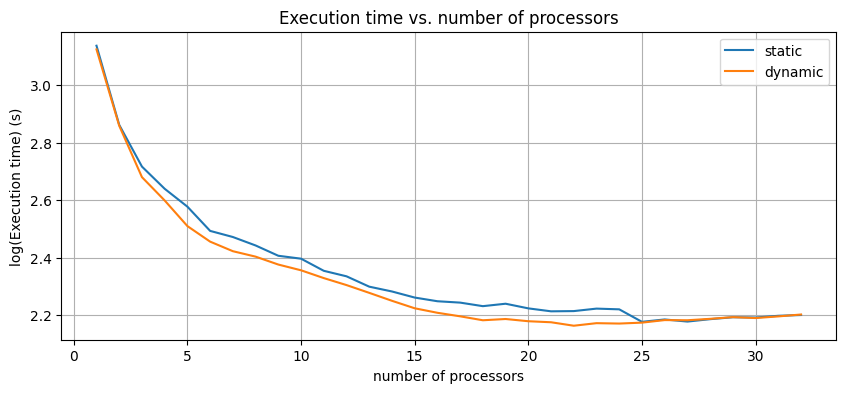

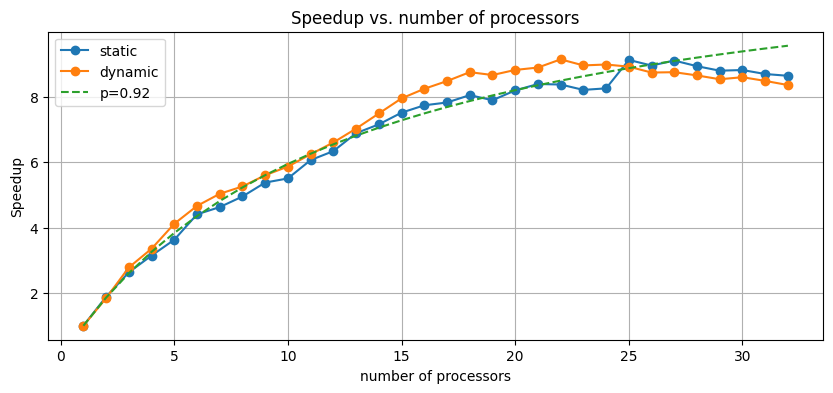

In [ ]:
with open('task5_result.txt', 'r') as file:
    task5_content = file.read()
    task5_content =dict(eval(task5_content))

with open('task6_result.txt', 'r') as file:
    task6_content = file.read()
    task6_content =dict(eval(task6_content))
    
fig, ax = plt.subplots(1,1, figsize = (10,4)) 
#process data

tasks = dict(static = task5_content,
             dynamic = task6_content)

speedups = {}

for task in tasks.keys():
    task_content=tasks[task]
    result = np.array([np.array([key,val]) for key,val in task_content.items()])
    n_processors, exec_times = result.T
    n_processors = n_processors.astype(np.int8)
    result = np.array([np.array([key,val]) for key,val in task_content.items()])
    n_processors, exec_times = result.T
    n_processors = n_processors.astype(np.int8)
    speedup = exec_times[0]/exec_times
    speedups[task] = (n_processors, speedup)
    #visualize data
    #Execution time plot
    ax.plot(n_processors, np.log10(exec_times), linestyle='-', label=task)
    
ax.set(title=f'Execution time vs. number of processors', xlabel='number of processors', ylabel='log10(Execution time) (s)')
ax.legend()
ax.grid(True)
plt.show()
    
###Plot speedup
# #compute experimental speedup
###Compute experimental parallelization
speedup = speedups['dynamic'][1]
def amdahl(P, F):
    return 1 / (F/P + (1 - F))
params, _ = scipy.optimize.curve_fit(amdahl, n_processors, speedup, bounds=(0, 1))
F_opt = params[0]
fig, ax = plt.subplots(1,1, figsize = (10,4))

for task in tasks.keys():
    ax.plot(*speedups[task], linestyle='-', marker='o', label=task)
ax.plot(n_processors, [amdahl(p, F_opt) for p in n_processors], '--', label=f'p={F_opt:.2f}')


ax.set(title=f'Speedup vs. number of processors', xlabel='number of processors', ylabel='Speedup')
ax.legend()
ax.grid(True)
plt.show()